In [9]:
#Importing libraries
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


    
#Import dataset
df = pd.read_excel('Online Retail.xlsx')

display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [4]:
duplicates = df[df.duplicated()]

print(duplicates)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

In [5]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Get all column names
all_variables = df.columns

# Target variable
output_variable = "Quantity"

# Feature variables(all columns except the target) 
features = all_variables.drop(output_variable).to_list()

print(features)


['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


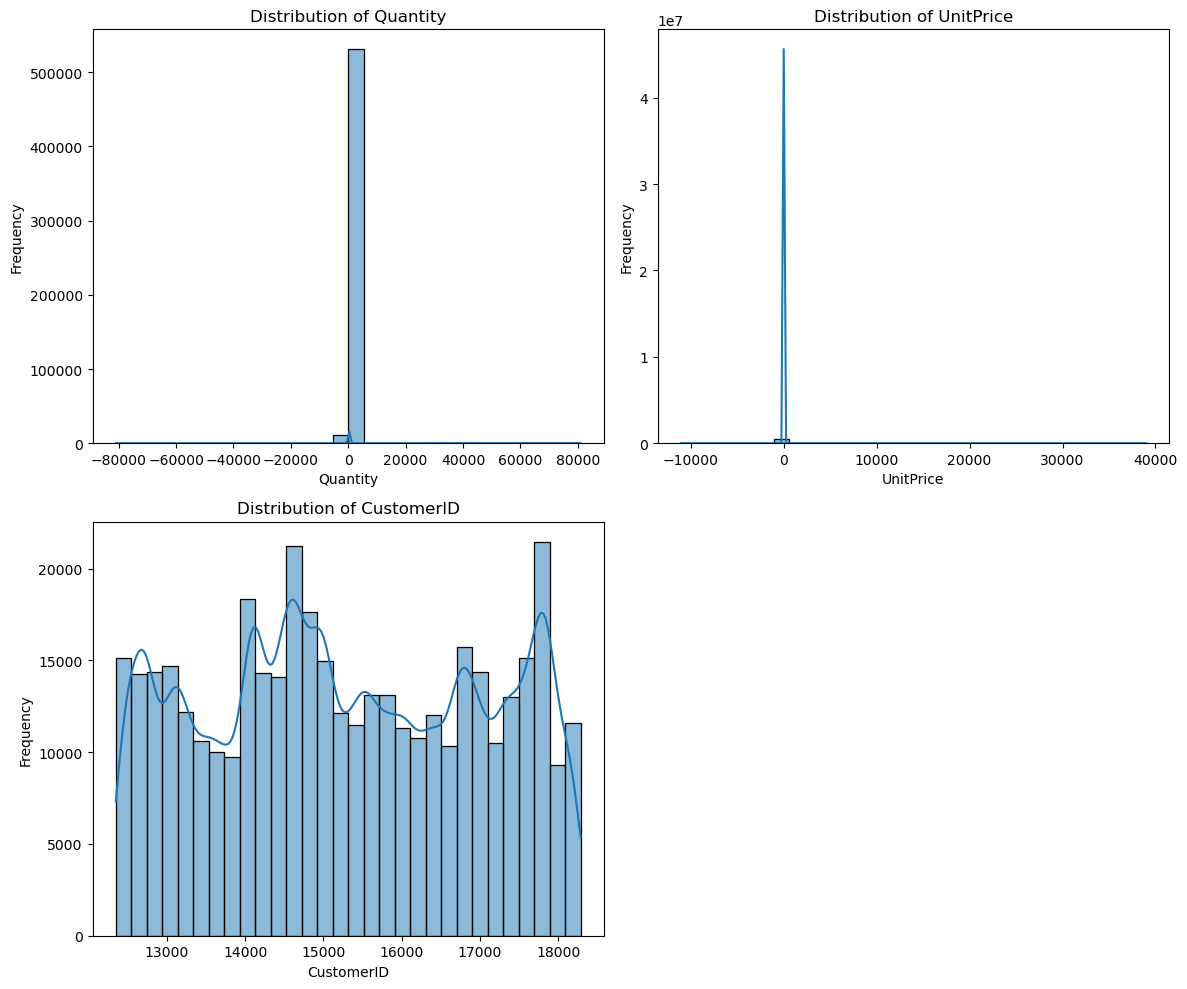

In [7]:
# Histogram of numerical features
numeric = df.select_dtypes(include='number').columns

plots = len(numeric)
rows = (plots // 2) + 1  
plt.figure(figsize=(12, 5 * rows))
for i, col in enumerate(numeric):
    plt.subplot(rows, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

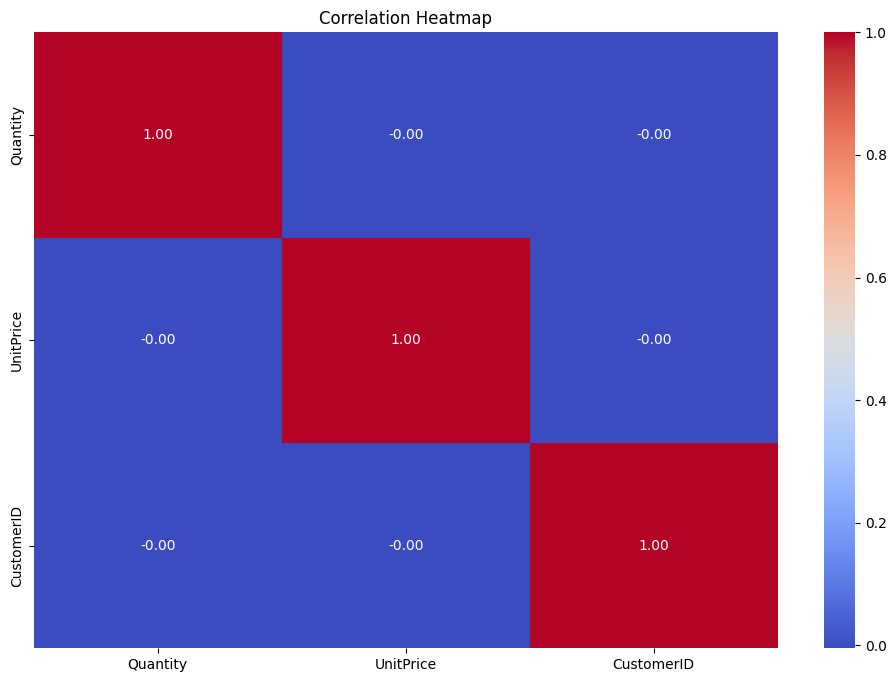

In [13]:
# Select numeric columns 
numeric = df.select_dtypes(include='number')

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


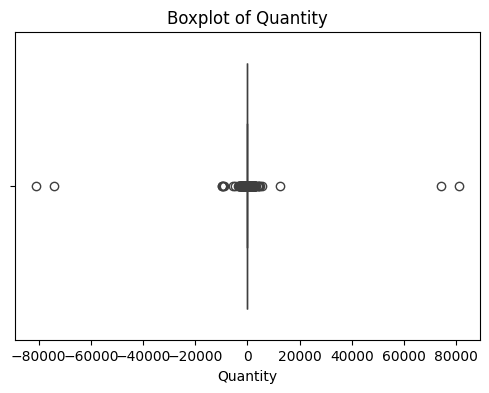

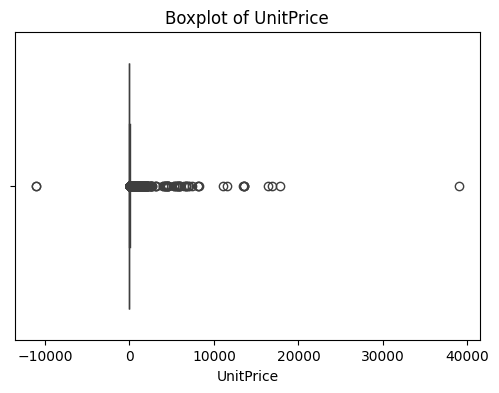

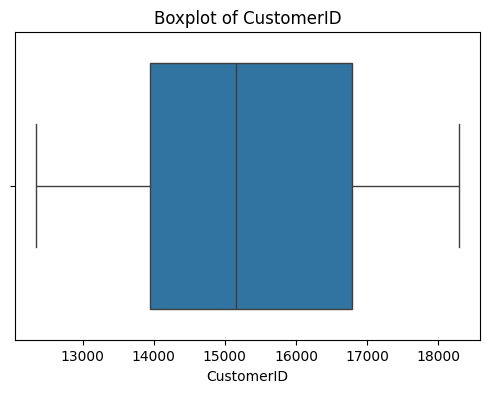

In [14]:
#Boxplots for Outlier Detection
for col in numeric:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()



In [8]:
# Drop rows with missing CustomerID or Description
df = df.dropna(subset=['CustomerID', 'Description'])

# Remove returns or incorrect entries 
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#Fix data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
#create new columns to split the invoice date
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Convert text columns to category type 
df['Country'] = df['Country'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')

# Turn category values into numbers 
df['CountryCode'] = df['Country'].cat.codes
df['ProductCode'] = df['StockCode'].cat.codes

print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'DayOfWeek',
       'Hour', 'CountryCode', 'ProductCode'],
      dtype='object')


In [10]:
# Scale UnitPrice and Quantity 
scaler = StandardScaler()
df[['UnitPrice', 'Quantity']] = scaler.fit_transform(df[['UnitPrice', 'Quantity']])



In [11]:
#Input
X = df[['ProductCode', 'UnitPrice', 'Hour', 'DayOfWeek', 'CountryCode']]

#Target we want to predict 
y = df['Quantity']  

# Training test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Part 2: Model Building and Evaluation

# Import necessary libraries (extends imports)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import joblib

# Verify required objects exist
try:
    X_train.shape, X_test.shape, y_train.shape, y_test.shape, scaler
except NameError as e:
    raise NameError(f"Required variable missing: {e}. Ensure Part 1 and train-test split have run.")


In [15]:
# Block 1: Model Development
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(kernel='linear')  # Linear kernel for faster computation
}

# Train models
for model_name, model in models.items():
    if model_name == 'SVR':
        # Subsample ~500 rows for SVR to drastically reduce runtime
        np.random.seed(42)  # Set seed for reproducibility
        sample_idx = np.random.choice(X_train.index, size=500, replace=False)
        X_train_sample = X_train.loc[sample_idx]
        y_train_sample = y_train.loc[sample_idx]
        model.fit(X_train_sample, y_train_sample)
        print(f"Trained {model_name} model on ~500 rows")
    else:
        model.fit(X_train, y_train)
        print(f"Trained {model_name} model")

Trained Linear Regression model
Trained Random Forest model
Trained SVR model on ~500 rows


In [17]:
# Block 2: Hyperparameter Tuning
# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.5]
    }
}

# Perform tuning
best_models = {}
for model_name in models:
    if model_name in param_distributions:
        if model_name == 'SVR':
            # Use subsampled data for SVR tuning
            np.random.seed(42)  # Set seed for reproducibility
            sample_idx = np.random.choice(X_train.index, size=500, replace=False)
            X_train_sample = X_train.loc[sample_idx]
            y_train_sample = y_train.loc[sample_idx]
            random_search = RandomizedSearchCV(
                estimator=models[model_name],
                param_distributions=param_distributions[model_name],
                n_iter=1,  # Minimal iterations
                cv=2,      # Minimal folds
                scoring='r2',
                n_jobs=1,  # Avoid parallelization overhead
                random_state=42
            )
            random_search.fit(X_train_sample, y_train_sample)
        else:
            random_search = RandomizedSearchCV(
                estimator=models[model_name],
                param_distributions=param_distributions[model_name],
                n_iter=10,
                cv=10,
                scoring='r2',
                n_jobs=-1,
                random_state=42
            )
            random_search.fit(X_train, y_train)
        best_models[model_name] = random_search.best_estimator_
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
    else:
        # Linear Regression: no tuning needed
        best_models[model_name] = models[model_name]
        print(f"No tuning for {model_name}")

No tuning for Linear Regression
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
Best parameters for SVR: {'epsilon': 0.1, 'C': 10}


In [19]:
# Block 3: Model Evaluation
# Function to inverse transform Quantity
def inverse_transform_quantity(y):
    try:
        # Convert y to NumPy array if it's a Pandas Series
        y_np = y.to_numpy() if isinstance(y, pd.Series) else y
        dummy = np.zeros_like(y_np).reshape(-1, 1)
        scaled = np.hstack([dummy, y_np.reshape(-1, 1)])
        return scaler.inverse_transform(scaled)[:, 1]
    except Exception as e:
        raise ValueError(f"Error in inverse_transform_quantity: {e}. Ensure scaler is fit on [UnitPrice, Quantity].")

# Evaluate models
results = {
    'Model': [],
    'Train RMSE (Std)': [],
    'Test RMSE (Std)': [],
    'Train MAE (Std)': [],
    'Test MAE (Std)': [],
    'Train RMSE (Orig)': [],
    'Test RMSE (Orig)': [],
    'Train MAE (Orig)': [],
    'Test MAE (Orig)': [],
    'Train R²': [],
    'Test R²': [],
    'CV R² (Mean)': [],
    'CV R² (Std)': []
}

for model_name, model in best_models.items():
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Standardized metrics
    train_rmse_std = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse_std = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae_std = mean_absolute_error(y_train, y_pred_train)
    test_mae_std = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Original scale metrics
    y_train_orig = inverse_transform_quantity(y_train)
    y_test_orig = inverse_transform_quantity(y_test)
    y_pred_train_orig = inverse_transform_quantity(y_pred_train)
    y_pred_test_orig = inverse_transform_quantity(y_pred_test)
    
    train_rmse_orig = np.sqrt(mean_squared_error(y_train_orig, y_pred_train_orig))
    test_rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_test_orig))
    train_mae_orig = mean_absolute_error(y_train_orig, y_pred_train_orig)
    test_mae_orig = mean_absolute_error(y_test_orig, y_pred_test_orig)
    
    # 10-fold cross-validation 
    if model_name != 'SVR':
        cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    else:
        cv_mean = np.nan
        cv_std = np.nan
    
    # Store results
    results['Model'].append(model_name)
    results['Train RMSE (Std)'].append(train_rmse_std)
    results['Test RMSE (Std)'].append(test_rmse_std)
    results['Train MAE (Std)'].append(train_mae_std)
    results['Test MAE (Std)'].append(test_mae_std)
    results['Train RMSE (Orig)'].append(train_rmse_orig)
    results['Test RMSE (Orig)'].append(test_rmse_orig)
    results['Train MAE (Orig)'].append(train_mae_orig)
    results['Test MAE (Orig)'].append(test_mae_orig)
    results['Train R²'].append(train_r2)
    results['Test R²'].append(test_r2)
    results['CV R² (Mean)'].append(cv_mean)
    results['CV R² (Std)'].append(cv_std)

# Display results
results_df = pd.DataFrame(results)
print("Model Evaluation Metrics:")
display(results_df)

Model Evaluation Metrics:


,Model,Train RMSE (Std),Test RMSE (Std),Train MAE (Std),Test MAE (Std),Train RMSE (Orig),Test RMSE (Orig),Train MAE (Orig),Test MAE (Orig),Train R²,Test R²,CV R² (Mean),CV R² (Std)
0,Linear Regression,1.111444,0.238071,0.073219,0.070664,199.317056,42.693646,13.130432,12.672352,0.000362,0.005144,0.004510,0.002454
1,Random Forest,0.743519,0.199427,0.031814,0.042401,133.336361,35.763576,5.705335,7.603901,0.552646,0.301903,-1.375626,2.120476
2,SVR,206.477476,164.071441,23.676698,23.286645,37027.925719,29423.185673,4245.978933,4176.030132,-34498.476978,-472511.223614,NaN,NaN


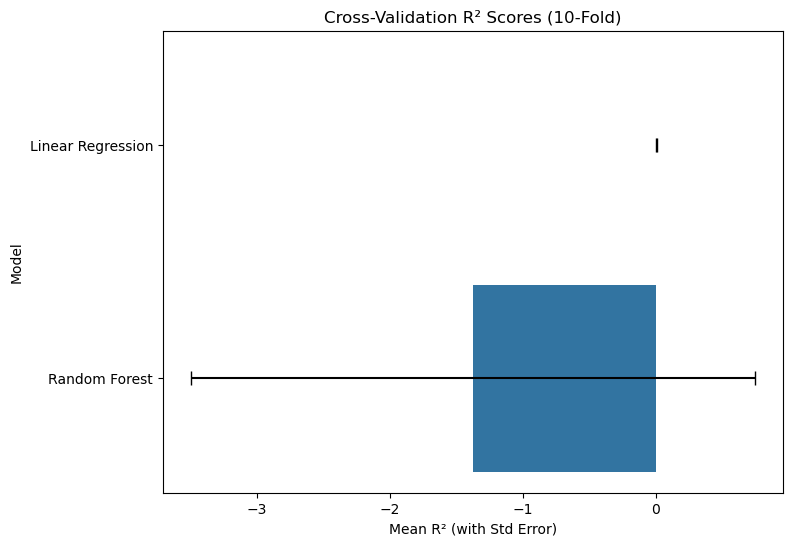

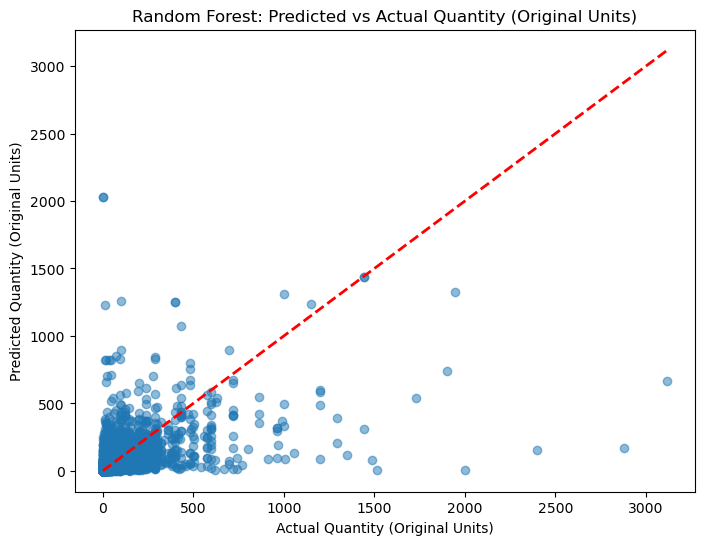

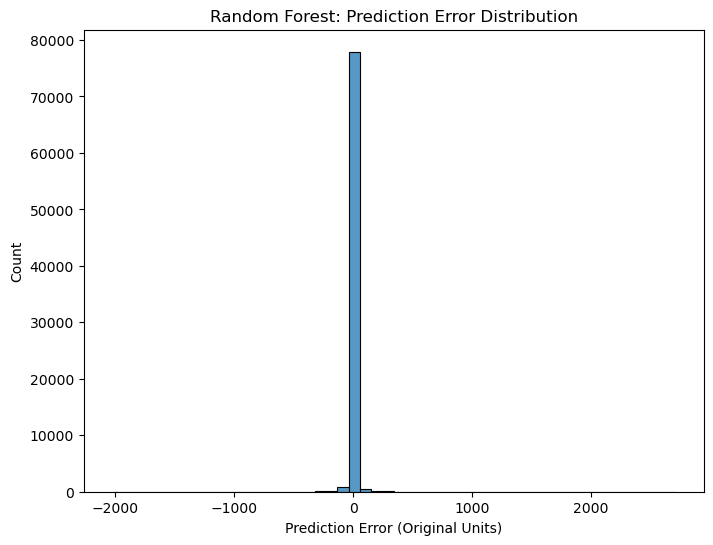

In [20]:
# Block 4: Visualize Model Performance
# Plot CV R² scores (exclude NaN for SVR)
plt.figure(figsize=(8, 6))
sns.barplot(x='CV R² (Mean)', y='Model', data=results_df[results_df['CV R² (Mean)'].notna()])
plt.errorbar(x=results_df[results_df['CV R² (Mean)'].notna()]['CV R² (Mean)'], 
             y=results_df[results_df['CV R² (Mean)'].notna()]['Model'], 
             xerr=results_df[results_df['CV R² (Mean)'].notna()]['CV R² (Std)'], 
             fmt='none', c='black', capsize=5)
plt.title('Cross-Validation R² Scores (10-Fold)')
plt.xlabel('Mean R² (with Std Error)')
plt.ylabel('Model')
plt.show()

# Plot predicted vs actual for best model
best_model_name = results_df.loc[results_df['Test R²'].idxmax(), 'Model']
y_pred_test_best = best_models[best_model_name].predict(X_test)
y_test_orig = inverse_transform_quantity(y_test)
y_pred_test_orig = inverse_transform_quantity(y_pred_test_best)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred_test_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual Quantity (Original Units)')
plt.ylabel('Predicted Quantity (Original Units)')
plt.title(f'{best_model_name}: Predicted vs Actual Quantity (Original Units)')
plt.show()

# Plot prediction error histogram
errors = y_test_orig - y_pred_test_orig
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=50)
plt.title(f'{best_model_name}: Prediction Error Distribution')
plt.xlabel('Prediction Error (Original Units)')
plt.ylabel('Count')
plt.show()

Selected final model: Random Forest


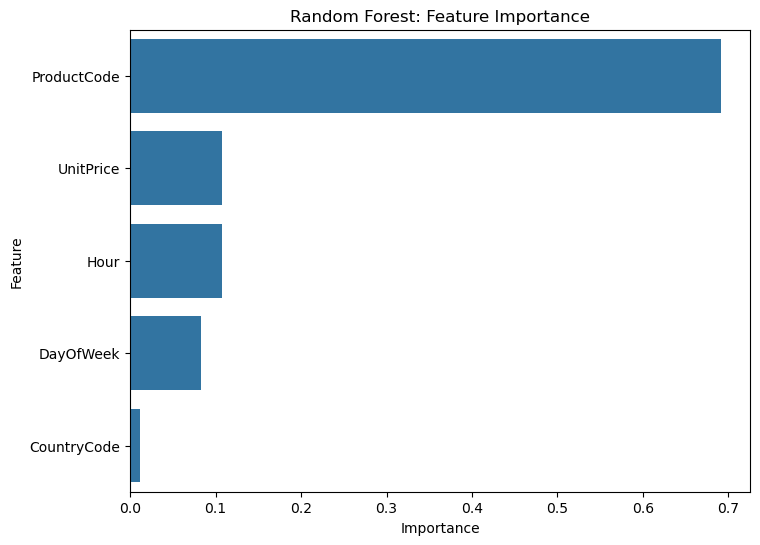

Saved final model at: ../artifacts/final_model.pkl
Saved best_models dictionary at: ../artifacts/best_models.pkl
Saved results_df at: ../artifacts/results_df.pkl
Saved training data statistics to ../artifacts/train_mean.csv and ../artifacts/train_std.csv


In [22]:
# Block 5: Final Model Selection and Saving
import pickle  # Import pickle 

# Select final model
final_model_name = best_model_name
final_model = best_models[final_model_name]
print(f"Selected final model: {final_model_name}")

# Plot feature importance for Random Forest
if final_model_name == 'Random Forest':
    plt.figure(figsize=(8, 6))
    sns.barplot(x=final_model.feature_importances_, y=X_train.columns)
    plt.title('Random Forest: Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Save final model to pickle file
try:
    os.makedirs("../artifacts", exist_ok=True)
    with open("../artifacts/final_model.pkl", "wb") as f:
        pickle.dump(final_model, f)
    print("Saved final model at: ../artifacts/final_model.pkl")
except Exception as e:
    print(f"Error saving final model with pickle: {e}")

# Optionally save best_models dictionary
try:
    with open("../artifacts/best_models.pkl", "wb") as f:
        pickle.dump(best_models, f)
    print("Saved best_models dictionary at: ../artifacts/best_models.pkl")
except Exception as e:
    print(f"Error saving best_models with pickle: {e}")

# Optionally save results_df
try:
    with open("../artifacts/results_df.pkl", "wb") as f:
        pickle.dump(results_df, f)
    print("Saved results_df at: ../artifacts/results_df.pkl")
except Exception as e:
    print(f"Error saving results_df with pickle: {e}")

# Save training data statistics
try:
    train_mean = X_train.mean()
    train_std = X_train.std()
    train_mean.to_csv("../artifacts/train_mean.csv")
    train_std.to_csv("../artifacts/train_std.csv")
    print("Saved training data statistics to ../artifacts/train_mean.csv and ../artifacts/train_std.csv")
except Exception as e:
    print(f"Error saving training statistics: {e}")
